<a href="https://colab.research.google.com/github/PacktPublishing/Modern-Computer-Vision-with-PyTorch/blob/master/Chapter01/Back_propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

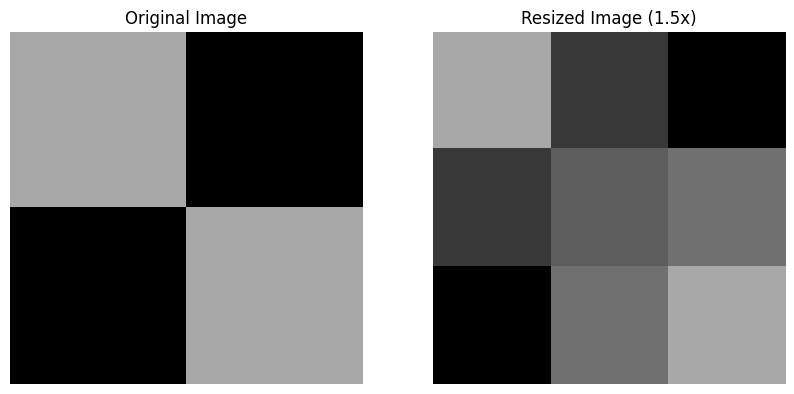

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def bilinear_interpolate(img, x, y):
    x_floor, y_floor = int(np.floor(x)), int(np.floor(y))
    x_ceil, y_ceil = min(x_floor + 1, img.shape[1] - 1), min(y_floor + 1, img.shape[0] - 1)
    
    dx = x - x_floor
    dy = y - y_floor
    
    # 双线性插值
    pixel_value = (img[y_floor, x_floor] * (1 - dx) * (1 - dy) +
                   img[y_floor, x_ceil] * (dx) * (1 - dy) +
                   img[y_ceil, x_floor] * (1 - dx) * (dy) +
                   img[y_ceil, x_ceil] * (dx) * (dy))
    return pixel_value.astype(np.uint8)

def resize_image(img, scale):
    new_width = int(img.shape[1] * scale)
    new_height = int(img.shape[0] * scale)
    resized_img = np.zeros((new_height, new_width, img.shape[2]), dtype=np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            x = j / scale
            y = i / scale
            pixel_value = bilinear_interpolate(img, x, y)
            resized_img[i, j] = pixel_value
            
    return resized_img

# 读取图片
#img_path = 'D:/adjustimg.bmp'
img_path = 'D:/test3.png'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
if img is None:
    print(f"Error: Unable to load image at {img_path}")
    exit()

# 将BGR格式转换为RGB格式
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 获取原始图像的尺寸
height, width, channels = img.shape

# 放大1.5倍
scale = 1.5
resized_img = resize_image(img, scale)

# 显示原始图像和放大后的图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Resized Image (1.5x)')
plt.imshow(resized_img)
plt.axis('off')

plt.show()